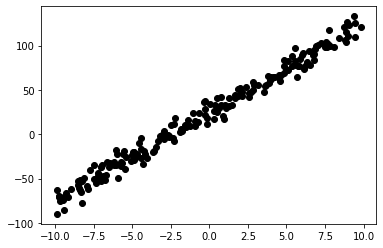

In [3]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/AssignmentFolder/Assignment03/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]


inputData = plt.scatter(x_data, y_data)
plt.setp(inputData, color = 'k', linewidth = 1.0)
#plt.axis([-30, 30, 0, 150])
#plt.figure(figsize=(8, 8))

plt.show()


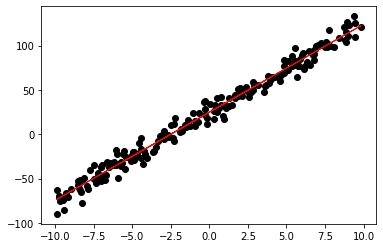

In [4]:
#iniitalize theta0, theta1
#energy J
J = 0
t0 = 0.0
t1 = 0.0

#num of data
m = x_data.size

#step_size
#if step size 'a' is a little bit big : Find faster
#if step size 'a' is very big : absolute value of cost increase continuously
#if step size 'a' is a small : Find slowly
a = 0.01

#The new line that is repected to the random dots
def hypothesis(t0, t1, x):
    return t0 * x + t1

#Lists that put data from loops
t0_list = []
t1_list = []
J_list = []

#Set infinite loops
while 1:
    h = hypothesis(t0, t1, x_data) - y_data
    #loop until convergence
    if J == np.mean(h**2)/2:
      break
    #Gradient Descent
    #Cost Function
    J = np.mean(h ** 2)/ 2
    #Theta 0
    t0 = t0 - a * np.mean(h * x_data)
    #Theta 1
    t1 = t1 - a * np.mean(h)
    
    #put the data into the lists
    J_list.append(J)
    t0_list.append(t0)
    t1_list.append(t1)
    

#line1 : solution from dots obtained linear Regression
line1 = plt.plot(x_data, hypothesis(t0, t1, x_data))
inputData = plt.scatter(x_data, y_data)
plt.setp(line1, color = 'r', linewidth = 1.0)
plt.setp(inputData, color = 'k', linewidth = 1.0)
plt.show()

[[72515.67177865 72210.7276823  71906.78358595 ... 68662.10216136
  68955.15806501 69249.21396866]
 [72401.3094404  72096.31660617 71792.32377193 ... 68518.59456758
  68811.60173334 69105.60889911]
 [72287.27353773 71982.2319656  71678.19039348 ... 68375.41340937
  68668.37183725 68962.33026513]
 ...
 [62396.72215432 62062.63280244 61729.54345056 ... 41114.28973068
  41378.2003788  41643.11102692]
 [62477.56828726 62143.43019749 61810.29210773 ... 41165.99060809
  41429.85251832 41694.71442856]
 [62558.74085576 62224.55402811 61891.36720046 ... 41218.01792106
  41481.83109341 41746.64426576]]


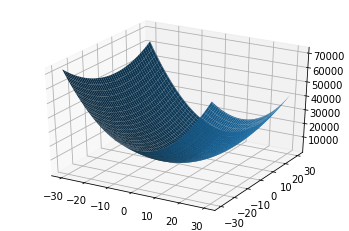

In [7]:
from mpl_toolkits.mplot3d import Axes3D


newt0_list = np.arange(-30.0, 30.1, 0.1) # 600
newt1_list = np.arange(-30.0, 30.1, 0.1) # 600

a = 0.01
newt0_result = [newt0_list[0]]
newt1_result = [newt1_list[0]]

newt0 = newt0_result[0] # -30
newt1 = newt1_result[0] # -30

newJ = 0

newJ_list1 = []
newJ_list2 = []
t0Size = 0
t1Size = 0
#drawing surface
while t0Size < len(newt0_list):
    newJ_list2 = []
    while t1Size < len(newt1_list):

        newJ = np.mean((newt0_list[t0Size] * x_data - y_data + newt1_list[t1Size] * 10) ** 2) / 2

        newJ_list2.append(newJ)
        t1Size = t1Size + 1
    
    newJ_list1.append(newJ_list2)
    t0Size = t0Size + 1
    t1Size = 0

newt0_list, newt1_list = np.meshgrid(newt0_list, newt1_list)


newJ_list = np.array(newJ_list1)
print(newJ_list)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(newt0_list, newt1_list, newJ_list)
plt.show()

In [0]:
while t0Size < len(newt0_list):
    newJ_list2 = []
    while t1Size < len(newt1_list):

        h = newt0_list[t0Size] * x_data + newt1_list[t1Size]
        newJ = np.mean((h - y_data) ** 2) / 2

        newJ_list2.append(newJ)
        t1Size = t1Size + 1
    
    newJ_list1.append(newJ_list2)
    t0Size = t0Size + 1
    t1Size = 0

[[36. 36.]
 [36. 36.]]


[[8.48528137 8.19790873 7.92173368 7.6579678  7.40793674 7.17307689
  6.95492537 6.75510112 6.57527528 6.41712928 6.2823006  6.17231747
  6.08852647 6.0320192  6.00356612 6.00356612 6.0320192  6.08852647
  6.17231747 6.2823006  6.41712928 6.57527528 6.75510112 6.95492537
  7.17307689 7.40793674 7.6579678  7.92173368 8.19790873 8.48528137]
 [8.19790873 7.90008956 7.61311841 7.33826808 7.07695091 6.83072028
  6.60126461 6.39039112 6.19999616 6.0320192  5.88837909 5.77089339
  5.68118492 5.62058388 5.590037   5.590037   5.62058388 5.68118492
  5.77089339 5.88837909 6.0320192  6.19999616 6.39039112 6.60126461
  6.83072028 7.07695091 7.33826808 7.61311841 7.90008956 8.19790873]
 [7.92173368 7.61311841 7.31489774 7.02839493 6.75510112 6.4966835
  6.25498612 6.0320192  5.82993219 5.65096563 5.49737804 5.37134689
  5.27484777 5.20952206 5.17655007 5.17655007 5.20952206 5.27484777
  5.37134689 5.49737804 5.65096563 5.82993219 6.0320192  6.25498612
  6.4966835  6.75510112 7.02839493 7.31489774 7

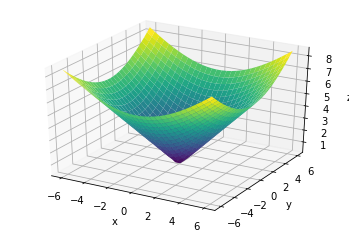

In [0]:
def f(x, y):
    return np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
print(Z)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: UserWarning: The following kwargs were not used by contour: 'color'


Text(0.5, 0.98, 'Minimizando f(x1,x2)')

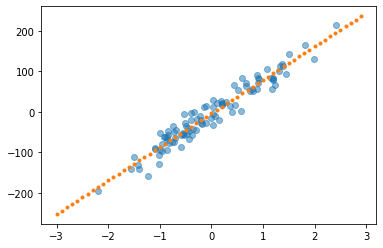

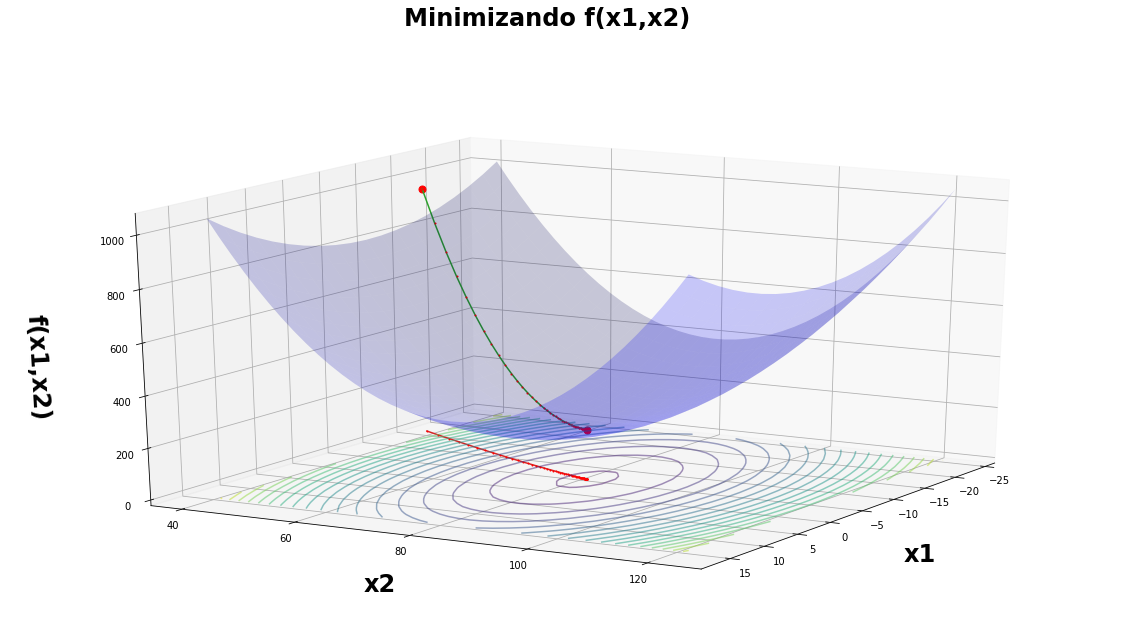

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 



x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')